<h3>
Prob & Stats Project
</h3>

<h1>
Writer: AmirMahdi Daraei
</h1>

In this jupyter notebook we work on a pre-collected sample of Netflix taste graph dataset.
At the end of the project, we expect our model to be able to show us the appropriate data clustering and graphing by using and processing data. 

In [3]:
# Imports & Predefined Vars

from attr import define
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

GRAPH_SIZE = 100

In [4]:
def find_eigenvalues_eigenvectors(matrix, threshold):
    """
    Compute the eigenvalues and eigenvectors of a given matrix, considering a threshold.

    Parameters:
        mat (numpy.ndarray): Input matrix for eigenvalue and eigenvector computation.
        threshold (float): Threshold value for filtering eigenvalues.

    Returns:
        tuple: A tuple containing the sorted eigenvalues and corresponding eigenvectors.

    """
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    masked_eigenvalues = np.where(eigenvalues < threshold, 0, eigenvalues)
    indices = np.argsort(masked_eigenvalues)
    sorted_eigenvalues = masked_eigenvalues[indices]
    sorted_eigenvectors = eigenvectors[:, indices]
    return sorted_eigenvalues, sorted_eigenvectors

In [8]:
def show_graph(adjacency_matrix, labels=None, node_size=500):
    """
    Visualize a graph based on an adjacency matrix.

    Parameters:
        adjacency_matrix (numpy.ndarray): Adjacency matrix representing the graph.
        labels (list, optional): List of labels for each node (default: None).
        node_size (int, optional): Size of the nodes in the graph (default: 500).

    """
    color_map = {1: 'blue', 2: 'green', 3: 'red', 4: 'yellow'}
    colors = [color_map[x] for x in labels] if labels is not None else None
        
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=node_size / 4, node_color=np.array(colors)[list(gr.nodes)] if labels is not None else None)
    plt.show()

In [9]:
def process_graph_data():
    """
    Process graph data from a file, compute eigenvalues and eigenvectors, and visualize the graph clusters.

    Reads the graph data from 'data/data.txt' file, constructs the adjacency matrix,
    computes the Laplacian matrix, finds eigenvalues and eigenvectors, and visualizes
    the graph clusters using the `show_graph` function.

    """
    
    adj = np.zeros((GRAPH_SIZE, GRAPH_SIZE))
    file1 = open('featured_data/data.txt', 'r')
    lines = file1.readlines()

    for l in lines[1:]:
        i, j = l.split()
        adj[int(i) - 1, int(j) - 1] = 1
        adj[int(j) - 1, int(i) - 1] = 1

    sum_matrix = np.sum(adj, axis=1)
    lapl = np.diag(sum_matrix) - adj
    val, vec = find_eigenvalues_eigenvectors(lapl, 1e-12)
    vec1 = vec[:, 1]
    vec2 = vec[:, 2]

    cluster1 = [1 if x < 0 else 2 for x in vec1]
    cluster2 = [
        1 if x > 0 and y > 0 else (2 if x > 0 and y < 0 else (3 if x < 0 and y > 0 else 4))
        for x, y in zip(vec1, vec2)
    ]

    show_graph(adj, cluster1)
    show_graph(adj, cluster2)

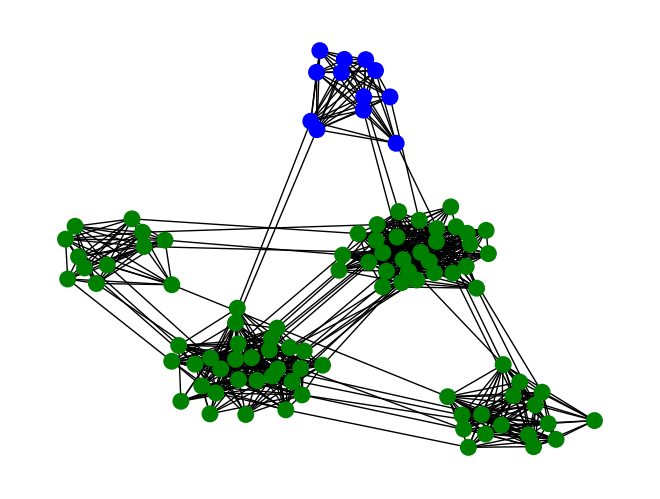

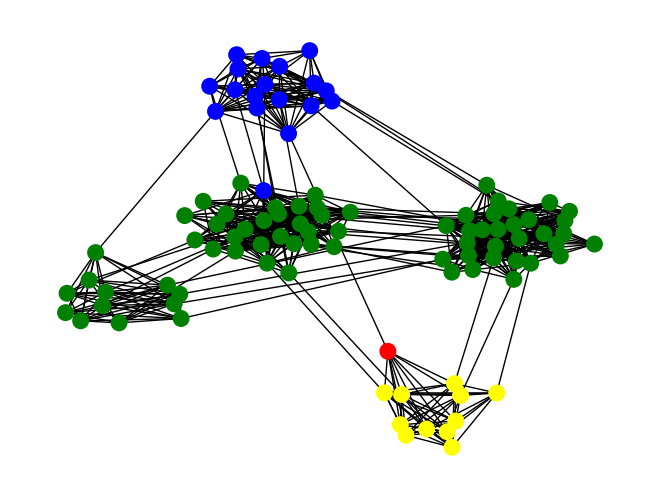

In [10]:
process_graph_data()